<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

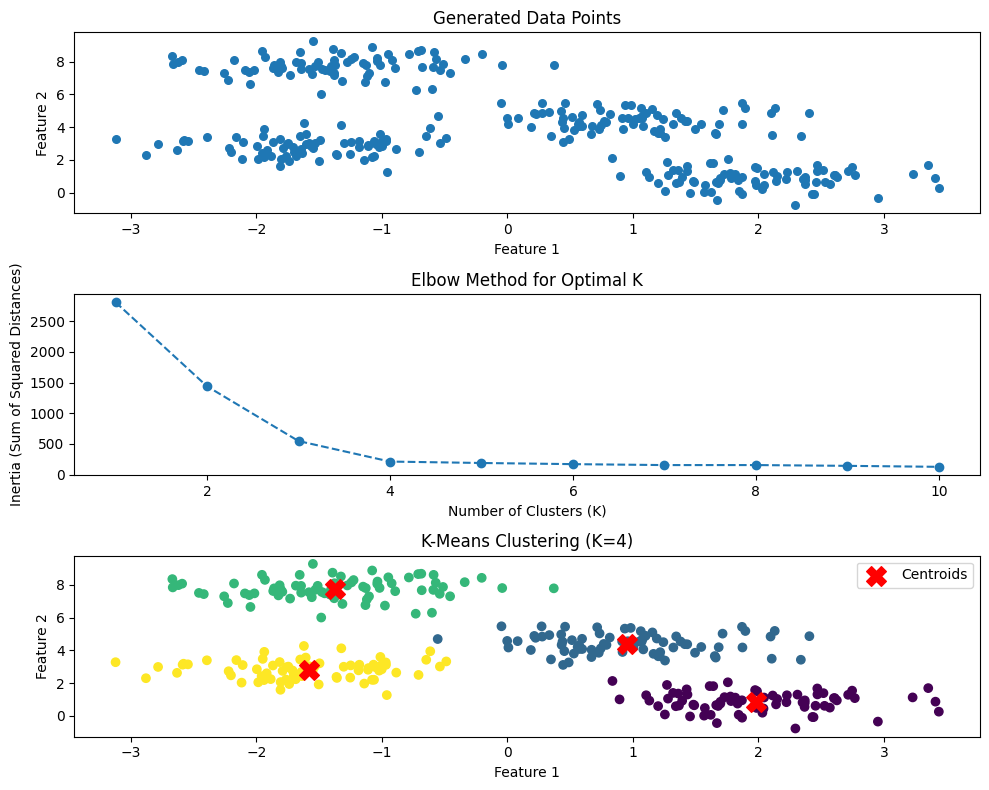

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

fig, axes = plt.subplots(3,1, figsize=(10,8))

# Step 2: Visualize the generated data
axes[0].scatter(X[:, 0], X[:, 1], s=30)
axes[0].set_title("Generated Data Points")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Step 3: Elbow Method to find optimal K
inertia_values = []
K_range = range(1, 11)  # testing K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the Elbow Graph
axes[1].plot(K_range, inertia_values, marker='o', linestyle='--')
axes[1].set_title("Elbow Method for Optimal K")
axes[1].set_xlabel("Number of Clusters (K)")
axes[1].set_ylabel("Inertia (Sum of Squared Distances)")

# Step 5: From the plot, we see an elbow at K=4, so let's use K=4
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 6: Visualize the Clusters
axes[2].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X', label='Centroids')
axes[2].set_title("K-Means Clustering (K=4)")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].legend()

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

def euclidean_distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

def manhattan_distance(p1, p2):
    """Calculate Manhattan distance between two points"""
    return np.sum(np.abs(np.array(p1) - np.array(p2)))

def cosine_similarity(p1, p2):
    """Calculate Cosine similarity between two points"""
    dot_product = np.dot(p1, p2)
    norm1 = np.linalg.norm(p1)
    norm2 = np.linalg.norm(p2)
    return dot_product / (norm1 * norm2)

def minkowski_distance(p1, p2, p):
    """Calculate Minkowski distance between two points"""
    return np.power(np.sum(np.abs(np.array(p1) - np.array(p2)) ** p), 1/p)

def compute_distance_matrix(points, distance_func, **kwargs):
    """Compute pairwise distance matrix for given points and distance function"""
    n = len(points)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distance_matrix[i][j] = distance_func(points[i], points[j], **kwargs)

    return distance_matrix

def main():
    # 2D points for Euclidean, Manhattan, Cosine, and Minkowski distances
    points_2d = np.array([
        [2, 3],
        [5, 7],
        [1, 8],
        [6, 2]
    ])

    # Binary points for Jaccard similarity
    points_binary = np.array([
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 1, 1, 0]
    ])

    print("=" * 60)
    print("DISTANCE AND SIMILARITY MATRICES ANALYSIS")
    print("=" * 60)

    # 1. Euclidean Distance
    print("\n1. EUCLIDEAN DISTANCE")
    print("Points:\n", points_2d)
    euclidean_matrix = compute_distance_matrix(points_2d, euclidean_distance)
    print("Euclidean Distance Matrix:\n", euclidean_matrix)

    # 2. Manhattan Distance
    print("\n2. MANHATTAN DISTANCE")
    print("Points:\n", points_2d)
    manhattan_matrix = compute_distance_matrix(points_2d, manhattan_distance)
    print("Manhattan Distance Matrix:\n", manhattan_matrix)

    # 3. Cosine Similarity
    print("\n3. COSINE SIMILARITY")
    print("Points:\n", points_2d)
    cosine_matrix = compute_distance_matrix(points_2d, cosine_similarity)
    print("Cosine Similarity Matrix:\n", cosine_matrix)

    # 4. Minkowski Distance (p=3)
    print("\n4. MINKOWSKI DISTANCE (p=3)")
    print("Points:\n", points_2d)
    minkowski_matrix = compute_distance_matrix(points_2d, minkowski_distance, p=3)
    print("Minkowski Distance Matrix (p=3):\n", minkowski_matrix)

    # 5. Jaccard Similarity
    print("\n5. JACCARD SIMILARITY")
    print("Binary Points:\n", points_binary)
    n = len(points_binary)
    jaccard_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            jaccard_matrix[i][j] = jaccard_score(points_binary[i], points_binary[j])

    print("Pairwise Jaccard Similarity Matrix:\n", jaccard_matrix)

if __name__ == "__main__":
    main()

DISTANCE AND SIMILARITY MATRICES ANALYSIS

1. EUCLIDEAN DISTANCE
Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]
Euclidean Distance Matrix:
 [[0.         5.         5.09901951 4.12310563]
 [5.         0.         4.12310563 5.09901951]
 [5.09901951 4.12310563 0.         7.81024968]
 [4.12310563 5.09901951 7.81024968 0.        ]]

2. MANHATTAN DISTANCE
Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]
Manhattan Distance Matrix:
 [[ 0.  7.  6.  5.]
 [ 7.  0.  5.  6.]
 [ 6.  5.  0. 11.]
 [ 5.  6. 11.  0.]]

3. COSINE SIMILARITY
Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]
Cosine Similarity Matrix:
 [[1.         0.99948011 0.89442719 0.78935222]
 [0.99948011 1.         0.87954345 0.80873608]
 [0.89442719 0.87954345 1.         0.4314555 ]
 [0.78935222 0.80873608 0.4314555  1.        ]]

4. MINKOWSKI DISTANCE (p=3)
Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]
Minkowski Distance Matrix (p=3):
 [[0.         4.49794145 5.01329793 4.02072576]
 [4.49794145 0.         4.02072576 5.01329793]
 [5.01329793 4.02072576 0.         6.986368

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


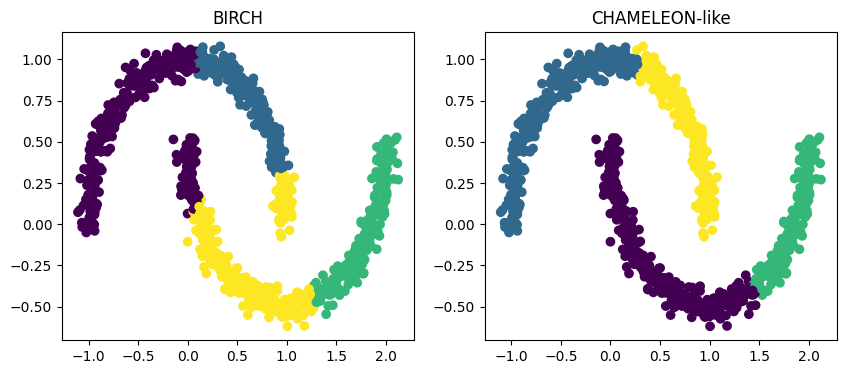

In [6]:
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# BIRCH
birch_labels = Birch(n_clusters=4).fit_predict(X)

# CHAMELEON-like
connectivity = kneighbors_graph(X, n_neighbors=10)
chameleon_labels = AgglomerativeClustering(n_clusters=4, connectivity=connectivity).fit_predict(X)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(X[:,0], X[:,1], c=birch_labels, cmap='viridis')
ax1.set_title("BIRCH")
ax2.scatter(X[:,0], X[:,1], c=chameleon_labels, cmap='viridis')
ax2.set_title("CHAMELEON-like")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


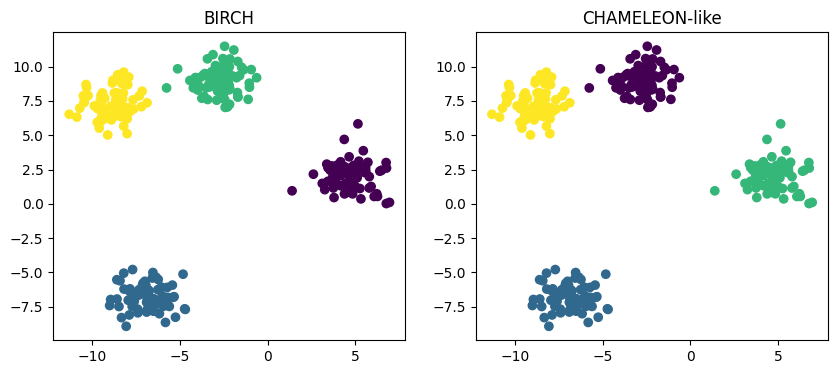

In [7]:
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# BIRCH
birch_labels = Birch(n_clusters=4).fit_predict(X)

# CHAMELEON-like
connectivity = kneighbors_graph(X, n_neighbors=10)
chameleon_labels = AgglomerativeClustering(n_clusters=4, connectivity=connectivity).fit_predict(X)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(X[:,0], X[:,1], c=birch_labels, cmap='viridis')
ax1.set_title("BIRCH")
ax2.scatter(X[:,0], X[:,1], c=chameleon_labels, cmap='viridis')
ax2.set_title("CHAMELEON-like")
plt.show()

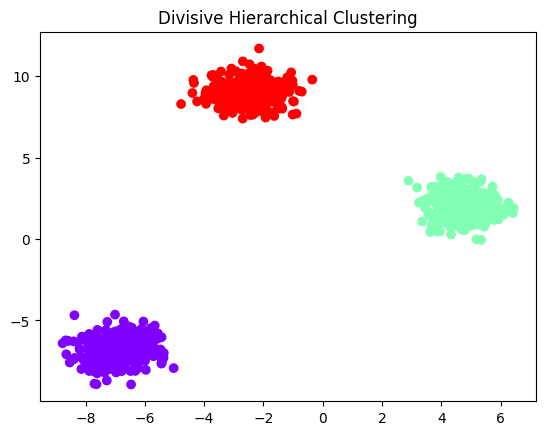

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.7, random_state=42)

def divisive_clustering(X, n_clusters=3):
    clusters = [X]  # Start with all points in one cluster
    labels = np.zeros(len(X), dtype=int)

    current_label = 0

    while len(clusters) < n_clusters:
        # Find the largest cluster to split
        largest_cluster_idx = np.argmax([len(c) for c in clusters])
        cluster_to_split = clusters.pop(largest_cluster_idx)

        # Split using k-means (k=2)
        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        split_labels = kmeans.labels_

        # Assign new clusters
        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]
        clusters.append(cluster1)
        clusters.append(cluster2)

    # Assign labels to points
    for i, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where((X == point).all(axis=1))[0][0]
            labels[idx] = i

    return labels

# Apply divisive clustering
labels = divisive_clustering(X, n_clusters=3)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Divisive Hierarchical Clustering")
plt.show()

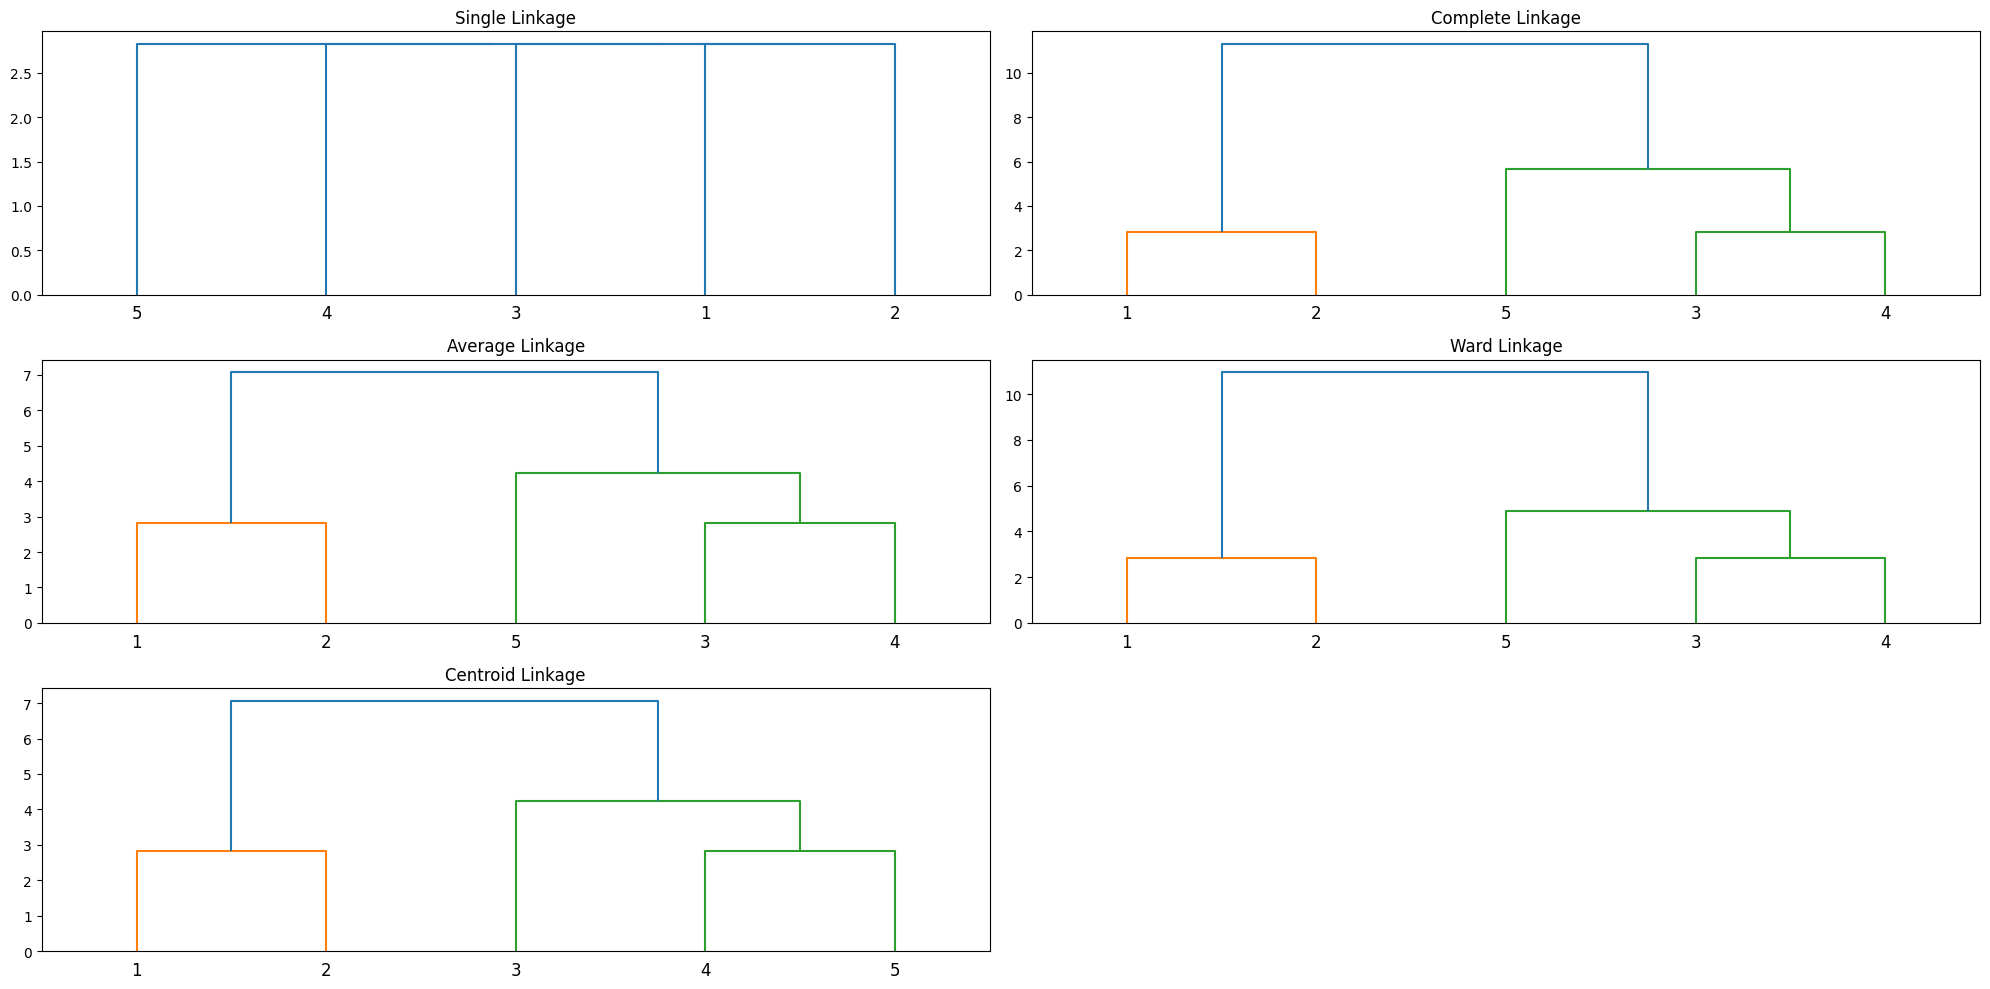

In [8]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample data (2D points)
data = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])

# 1. Single Linkage (minimum distance)
Z_single = linkage(data, method='single')

# 2. Complete Linkage (maximum distance)
Z_complete = linkage(data, method='complete')

# 3. Average Linkage (average distance)
Z_average = linkage(data, method='average')

# 4. Ward's Linkage (minimizes variance within clusters)
Z_ward = linkage(data, method='ward')

# 5. Centroid Linkage (distance between centroids)
Z_centroid = linkage(data, method='centroid')

# Plotting dendrograms for all linkage methods
methods = ['single', 'complete', 'average', 'ward', 'centroid']
Z_matrices = [Z_single, Z_complete, Z_average, Z_ward, Z_centroid]

plt.figure(figsize=(20, 10))

for i, (method, Z) in enumerate(zip(methods, Z_matrices)):
    plt.subplot(3, 2, i+1)
    dendrogram(Z, labels=np.arange(1, len(data)+1))
    plt.title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

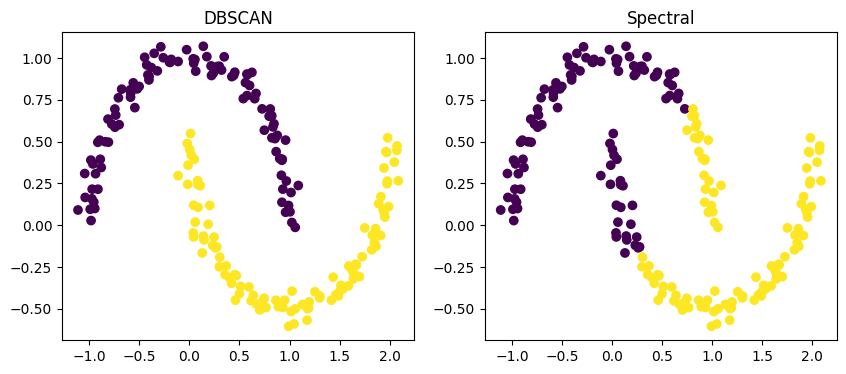

In [ ]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.05)

# DBSCAN
db_labels = DBSCAN(eps=0.3).fit_predict(X)

# Spectral
sp_labels = SpectralClustering(n_clusters=2).fit_predict(X)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(X[:,0], X[:,1], c=db_labels, cmap='viridis')
ax1.set_title("DBSCAN")
ax2.scatter(X[:,0], X[:,1], c=sp_labels, cmap='viridis')
ax2.set_title("Spectral")
plt.show()

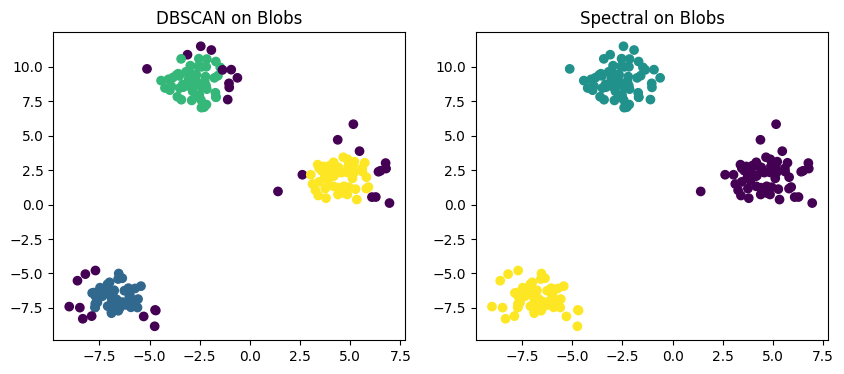

In [ ]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# DBSCAN
db_labels = DBSCAN(eps=0.8, min_samples=10).fit_predict(X)

# Spectral
sp_labels = SpectralClustering(n_clusters=3).fit_predict(X)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(X[:,0], X[:,1], c=db_labels, cmap='viridis')
ax1.set_title("DBSCAN on Blobs")
ax2.scatter(X[:,0], X[:,1], c=sp_labels, cmap='viridis')
ax2.set_title("Spectral on Blobs")
plt.show()